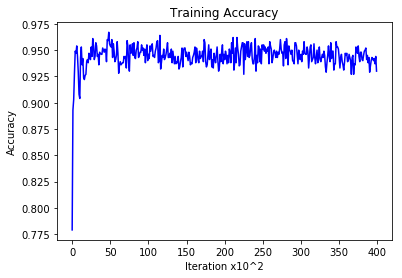

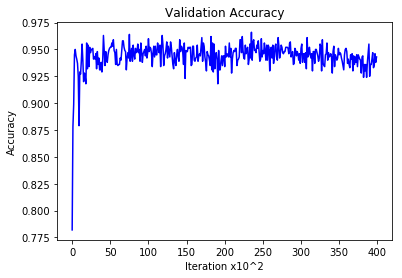

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy as sp
from scipy import special
from torch.autograd import Variable

images = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/images.npy")
labels = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/labels.npy")
height = images.shape[1]
width = images.shape[2]
size = height*width
data = images.reshape(images.shape[0],size)
training = 40000
validation = 45000
testing = 50000
apple_label = 0
rate = 0.000001
iterations = 1
w = Variable(torch.zeros(size), requires_grad=True).float()
accuracies = np.zeros(400)
val_accuracies = np.zeros(400)
w = fit(data, w, iterations, rate, accuracies, val_accuracies)
y_hat = prediction(w, data)


In [235]:
def fit(data, w, iterations, rate, accuracies, val_accuracies):
    for k in range(0, iterations):
        count = 0
        count_2 = 0
        for i in range(0, 40000):
            x = torch.from_numpy(data[i]).float()
            X_= Variable(x)
            val = 1
            if labels[i] != 0:
                val = -1
            dot_product = w.dot(X_)
            dotClamp = torch.clamp(dot_product, -700, 700)
            loss = torch.log(1 + torch.exp(-1*val*dotClamp.double()))
            loss.backward()
            w.data = w.data - rate*w.grad.data
            if i % 100 == 0:
                y_hat = np.zeros(1000)
                y = np.zeros(1000)
                for j in range(0, 1000):
                    s = np.random.randint(0,40000)
                    dat = torch.from_numpy(data[s]).float()
                    value = torch.FloatTensor([torch.dot(dat, w.data)])
                    valSig = torch.sigmoid(value)
                    if valSig[0] < 0.5:
                        y_hat[j] = 0.0
                    else:
                        y_hat[j] = 1.0
                    if labels[s] == 0:
                        y[j] = 1.0
                    else:
                        y[j] = 0.0
                accuracies[count] = accuracy(y, y_hat)
                count = count + 1
                for l in range(0, 1000):
                    s = np.random.randint(40000,45000)
                    dat = torch.from_numpy(data[s]).float()
                    value = torch.FloatTensor([torch.dot(dat, w.data)]).float()
                    valSig = torch.sigmoid(value)
                    if valSig[0] < 0.5:
                        y_hat[l] = 0.0
                    else:
                        y_hat[l] = 1.0
                    if labels[s] == 0:
                        y[l] = 1.0
                    else:
                        y[l] = 0.0
                val_accuracies[count_2] = accuracy(y, y_hat)
                count_2 = count_2 + 1  
    plt.figure(200)
    plt.title('Training Accuracy')
    plt.xlabel('Iteration x10^2')
    plt.ylabel('Accuracy')
    plt.plot(accuracies, 'b')
    plt.show()
    plt.figure(300)
    plt.title('Validation Accuracy')
    plt.xlabel('Iteration x10^2')
    plt.ylabel('Accuracy')
    plt.plot(val_accuracies, 'b')
    plt.show()
    return w



In [232]:
def prediction(w, data):
    y_hat = np.zeros(5000)
    for j in range(45000, 50000):
        dat = torch.from_numpy(data[j]).float()
        value = torch.FloatTensor([torch.dot(dat, w.data)])
        valSig = torch.sigmoid(value)
        if valSig[0] < 0.5:
            y_hat[j - 45000] = 0.0
        else:
            y_hat[j - 45000] = 1.0
    return y_hat

In [233]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

Not overfitting. Since our validation accuracies are about the same as our training accuracies, it is likely that our model is not overfitting to our training data because it is having a similar performance to data that we are not training on.